In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv(r'C:\Users\parnian\Desktop\medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [119]:
df.shape

(70000, 13)

In [120]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### **Handling Missing Values**

In [122]:
df.isnull().sum() / df.shape[0]

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [123]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [124]:
print("df['cardio']", df['cardio'].unique())
print("df['cholesterol']", df['cholesterol'].unique())
print("df['gluc']", df['gluc'].unique())
print("df['smoke']", df['smoke'].unique())
print("df['alco']", df['alco'].unique())
print("df['active']", df['active'].unique())
print("df['gender']", df['gender'].unique())

df['cardio'] [0 1]
df['cholesterol'] [1 3 2]
df['gluc'] [1 2 3]
df['smoke'] [0 1]
df['alco'] [0 1]
df['active'] [1 0]
df['gender'] [2 1 3]


In [125]:
boolean_cols = ['cardio', 'smoke', 'alco', 'active']
for col in boolean_cols:
  df[col] = df[col].replace({1: True, 0: False})


C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\1703762051.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({1: True, 0: False})


In [126]:
df['gender'].value_counts()

gender
1    45522
2    24467
3       11
Name: count, dtype: int64

In [127]:
df = df[df['gender'] != 3]

In [128]:
df['gender'] = df['gender'].replace({1 : "gender_a", 2 :"gender_b"})

In [129]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,gender_b,168,62.0,110,80,1,1,False,False,True,False
1,1,20228,gender_a,156,85.0,140,90,3,1,False,False,True,True
2,2,18857,gender_a,165,64.0,130,70,3,1,False,False,False,True
3,3,17623,gender_b,169,82.0,150,100,1,1,False,False,True,True
4,4,17474,gender_a,156,56.0,100,60,1,1,False,False,False,False


In [130]:
df['age'] = df['age'] // 365

## Distribution of numerical values

### Histograms

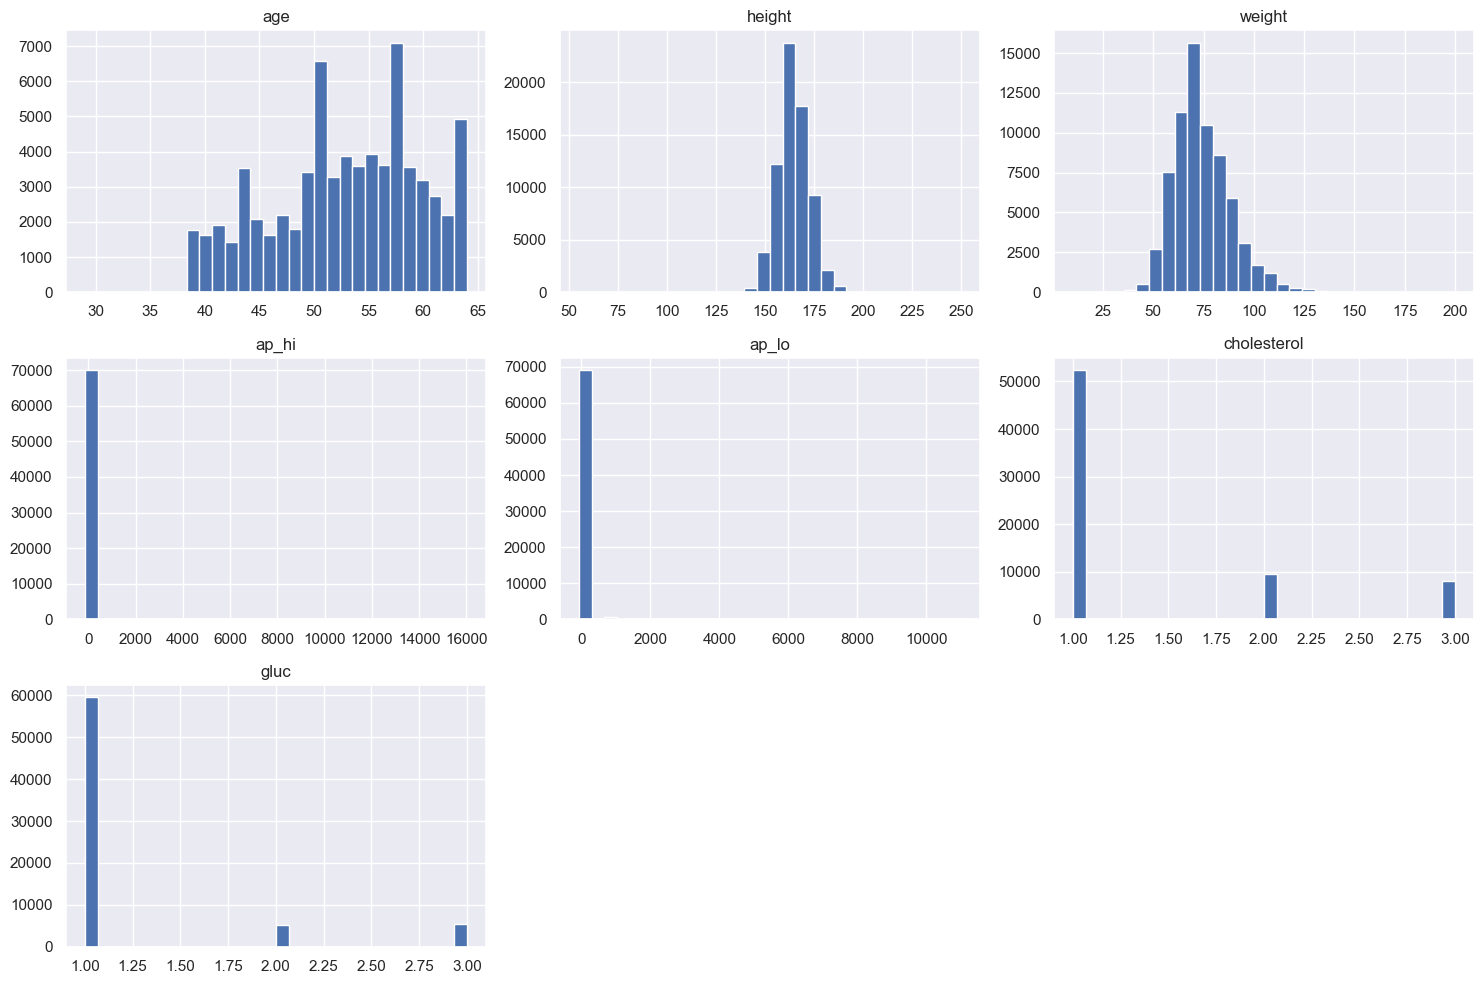

In [133]:
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### Density Plots

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


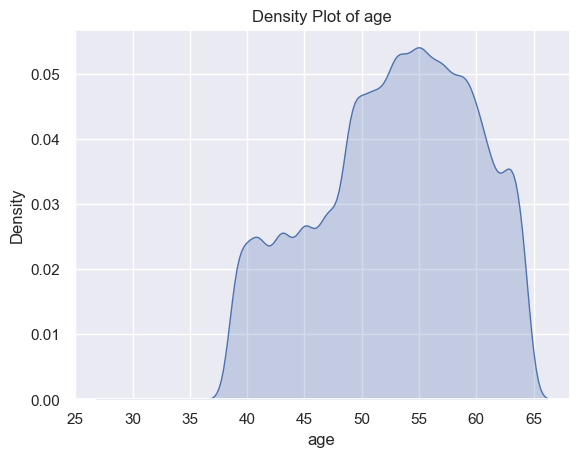

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


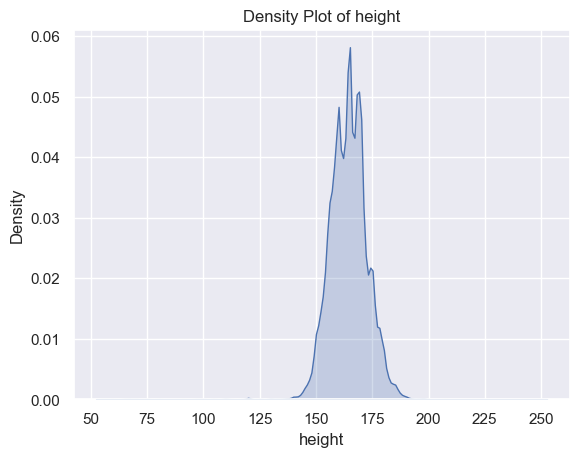

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


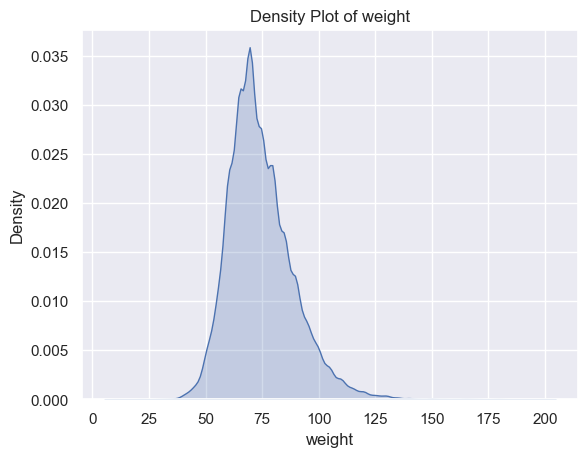

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


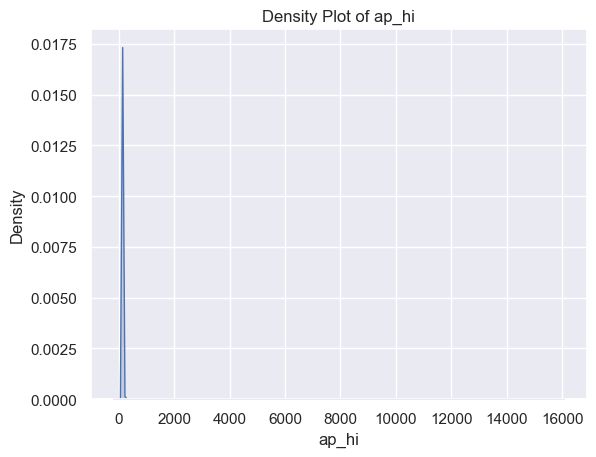

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


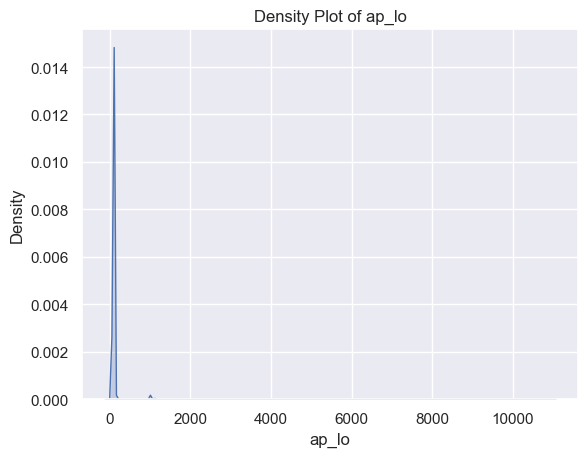

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


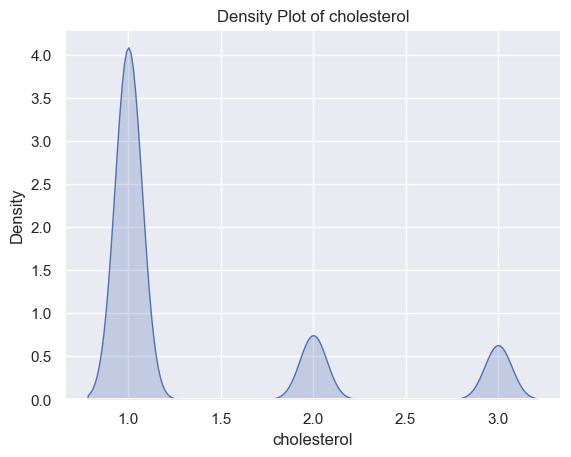

C:\Users\parnian\AppData\Local\Temp\ipykernel_13112\3324960755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, shade=True)


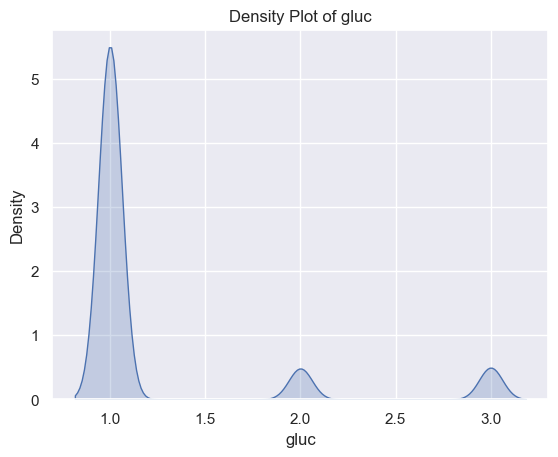

In [134]:
for col in numerical_cols:
    sns.kdeplot(data=df, x=col, shade=True)
    plt.title(f'Density Plot of {col}')
    plt.show()


### Boxplots

In [136]:
categorical_cols = ['smoke', 'alco', 'active', 'cardio', 'gender']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


smoke: [False  True]
alco: [False  True]
active: [ True False]
cardio: [False  True]
gender: ['gender_b' 'gender_a']


### Boxplot

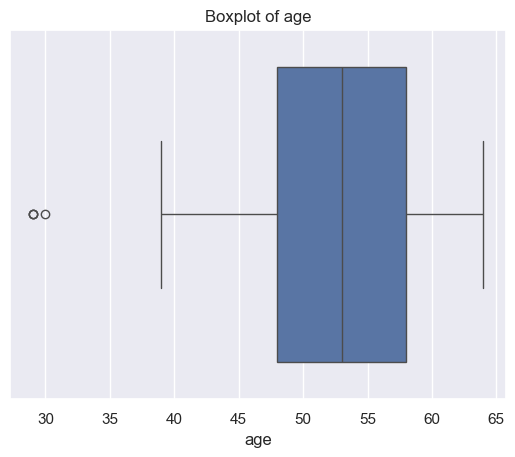

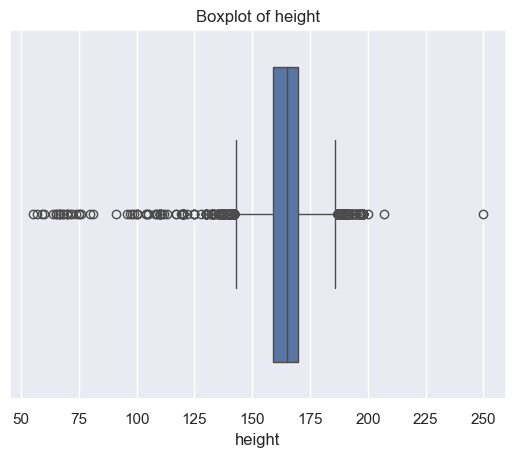

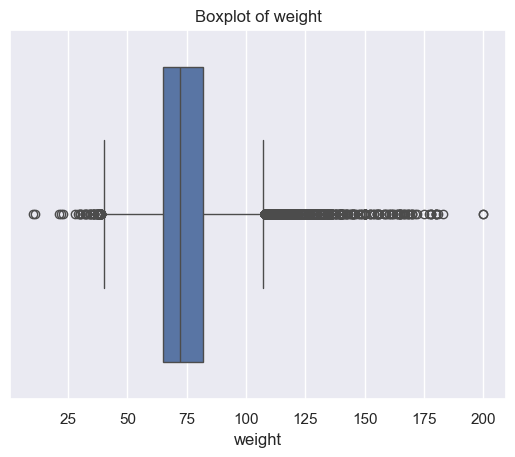

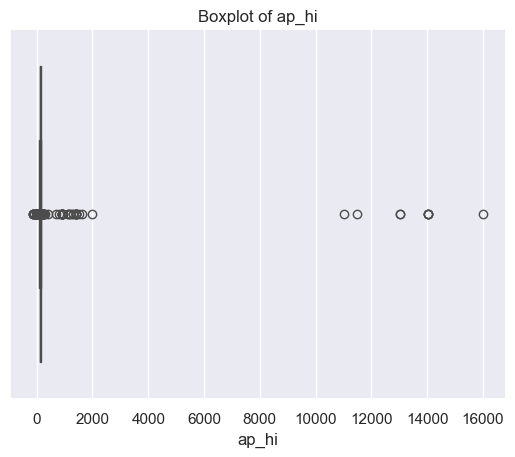

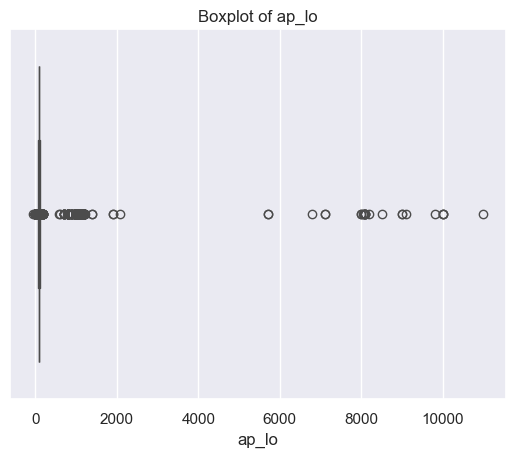

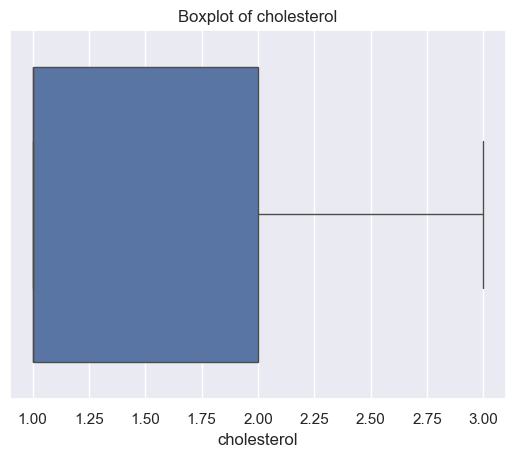

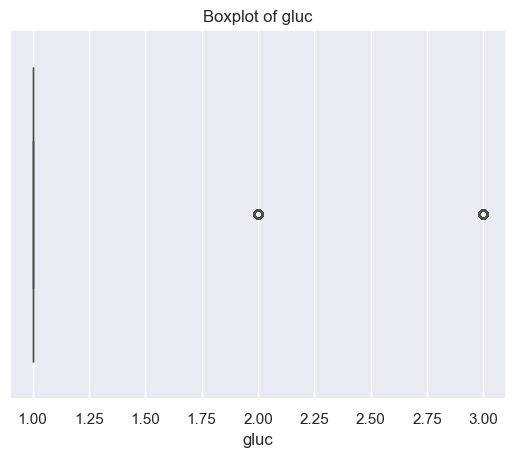

In [137]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Analysis of Categorical Variables

###  Count Plots

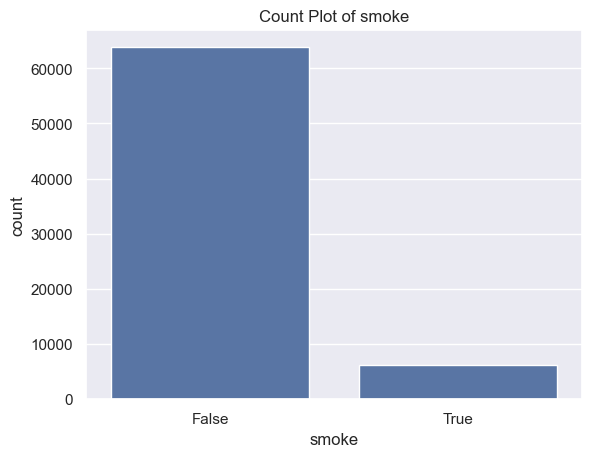

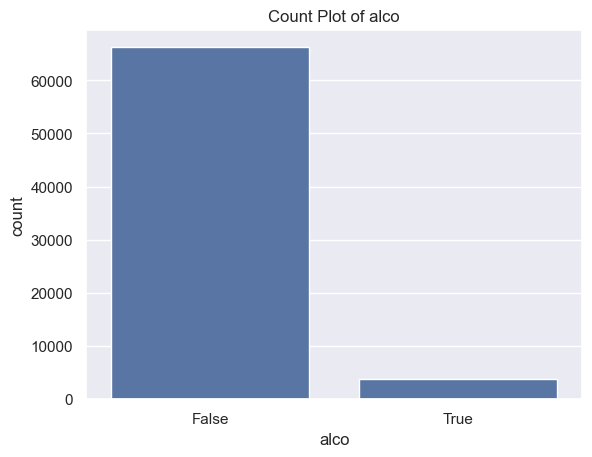

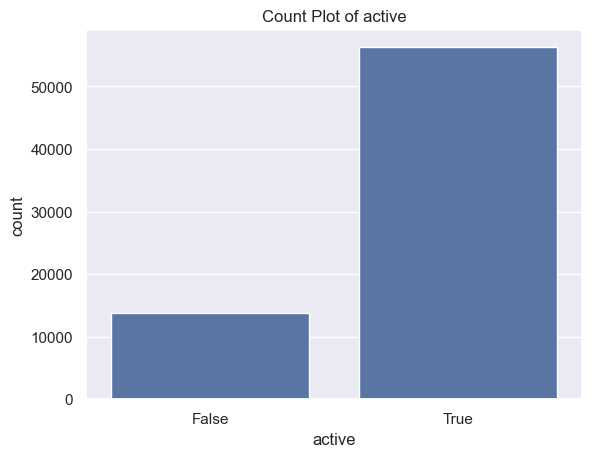

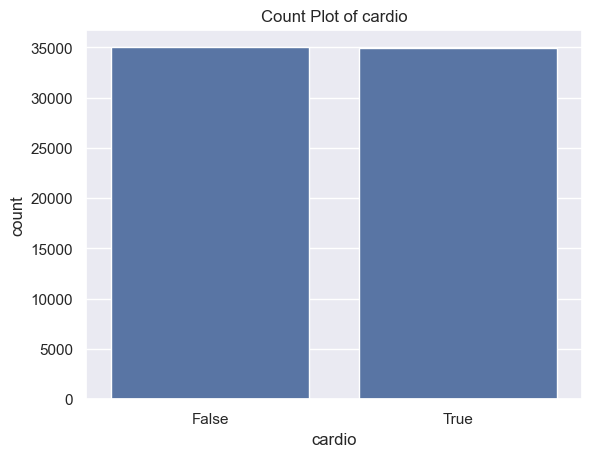

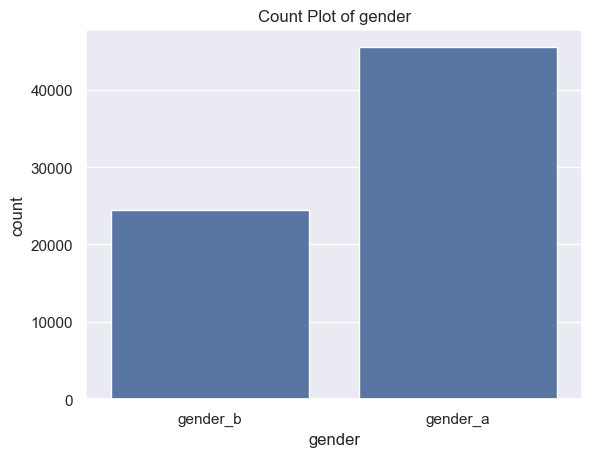

In [138]:
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()


### Pie Charts

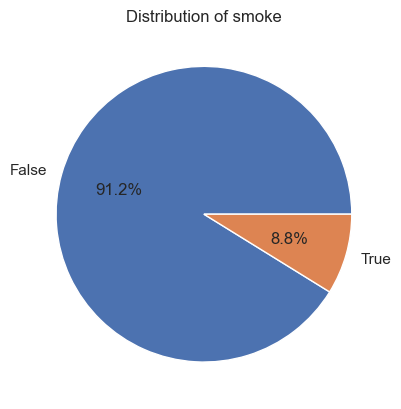

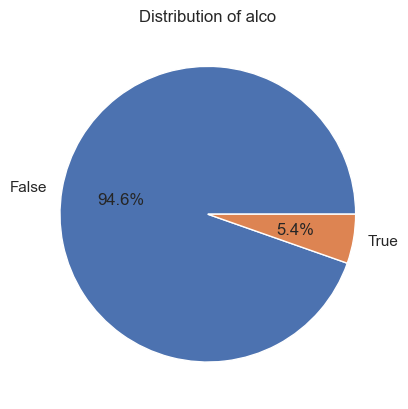

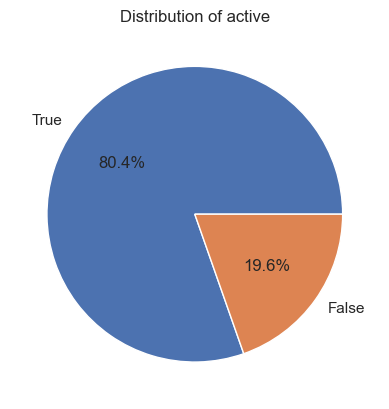

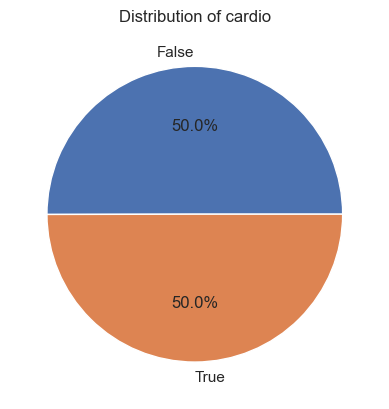

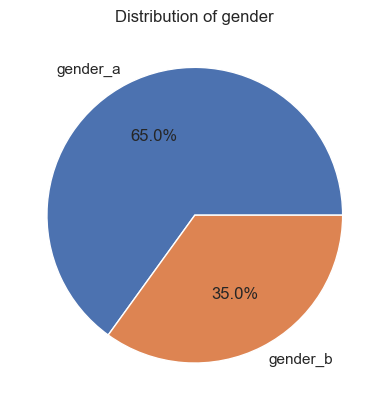

In [139]:
for col in categorical_cols:
    df[col].value_counts().plot.pie(autopct='%1.1f%%', title=f'Distribution of {col}')
    plt.ylabel('')
    plt.show()


### Pairplots

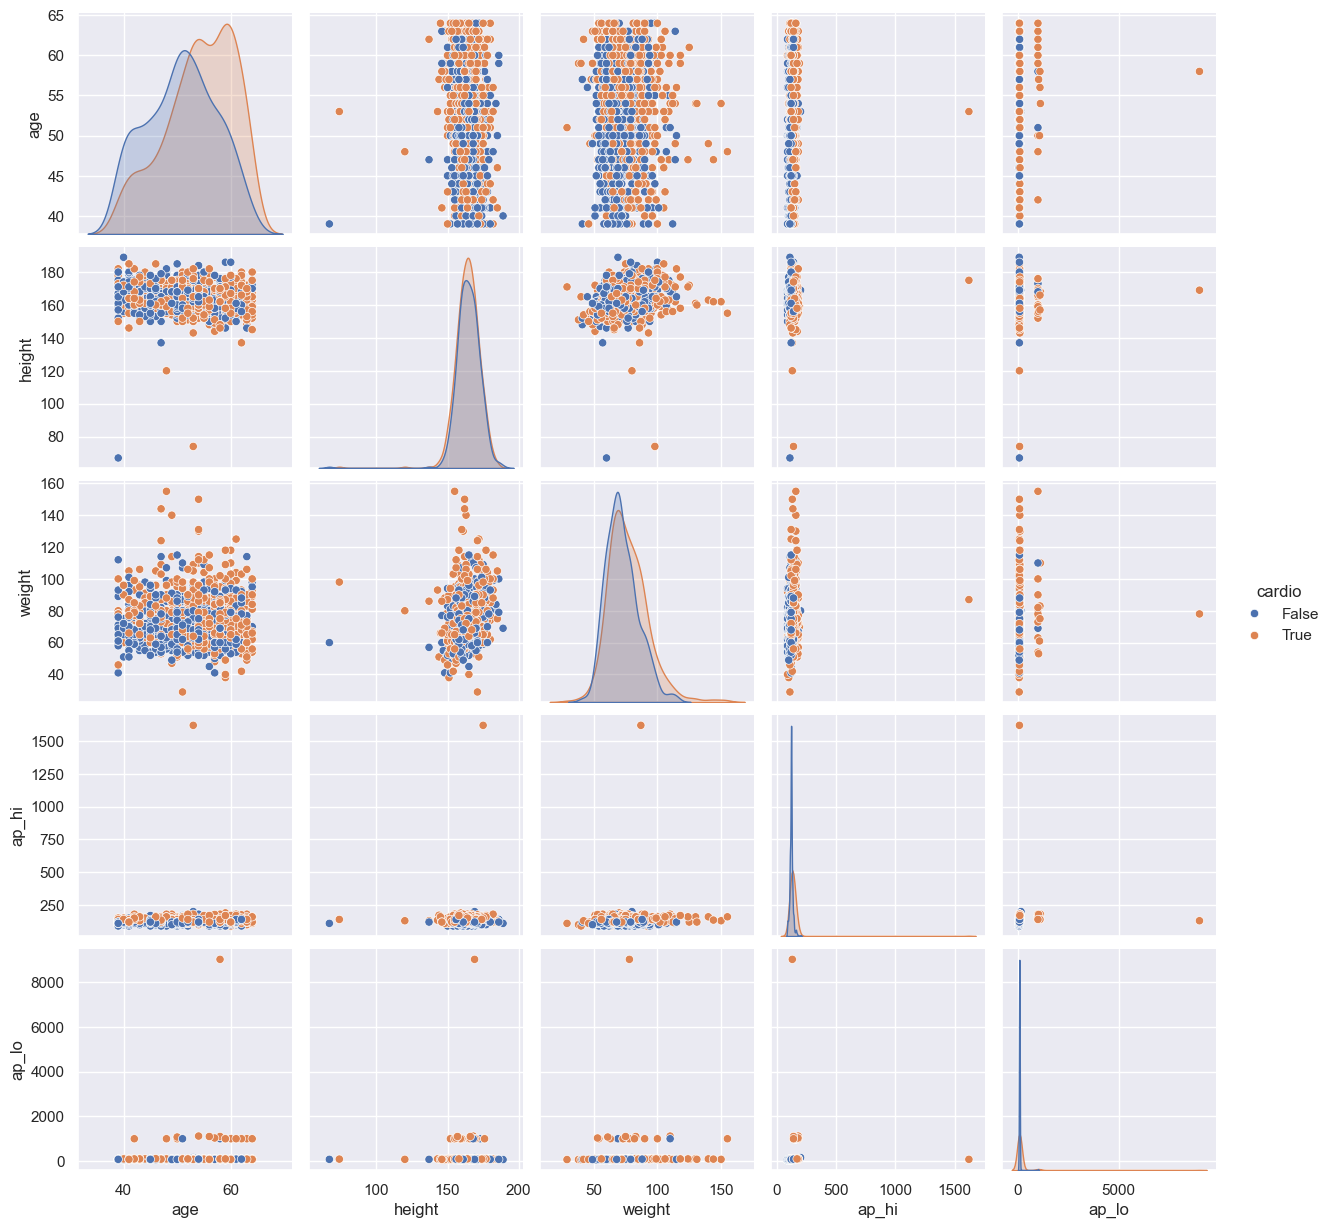

In [140]:
sample_df = df.sample(1000, random_state=42)
sns.pairplot(sample_df, hue='cardio', vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'])
plt.show()


###  Scatter Plots

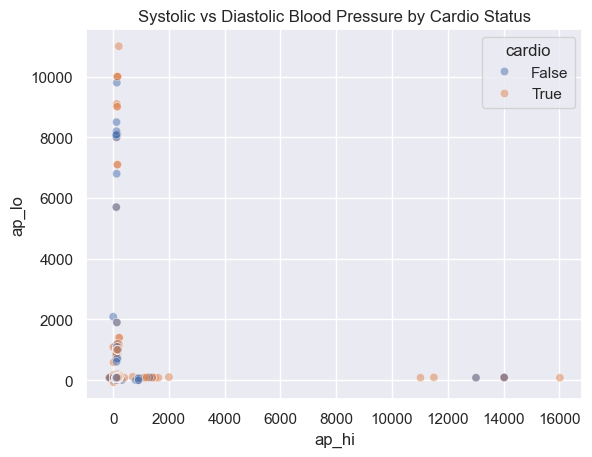

In [141]:
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', alpha=0.5, data=df)
plt.title('Systolic vs Diastolic Blood Pressure by Cardio Status')
plt.show()


## Categorical vs Numerical Variables

### Boxplots

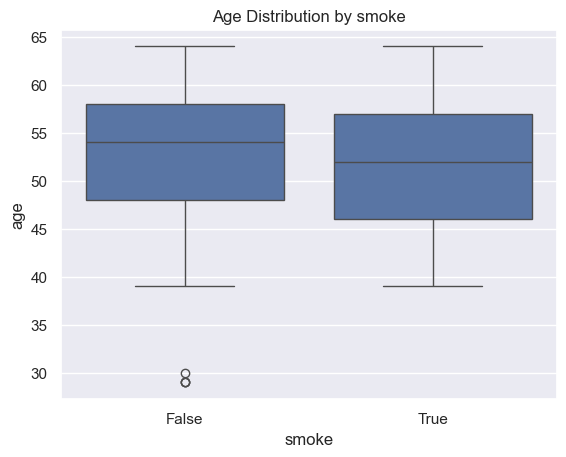

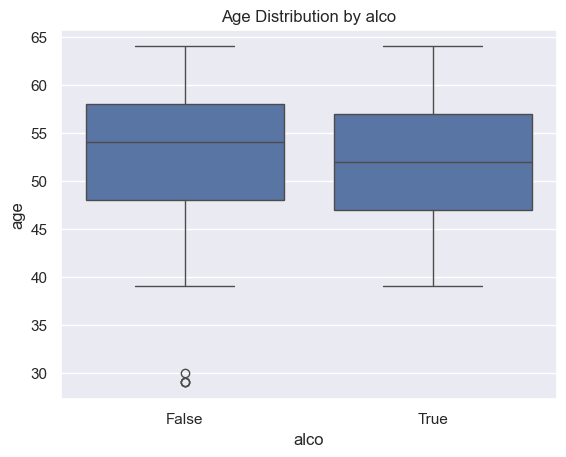

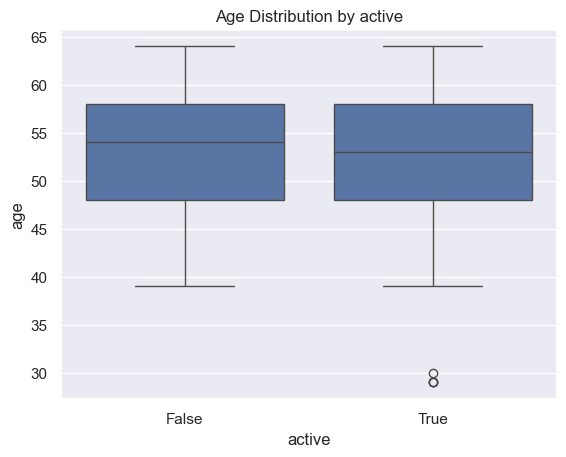

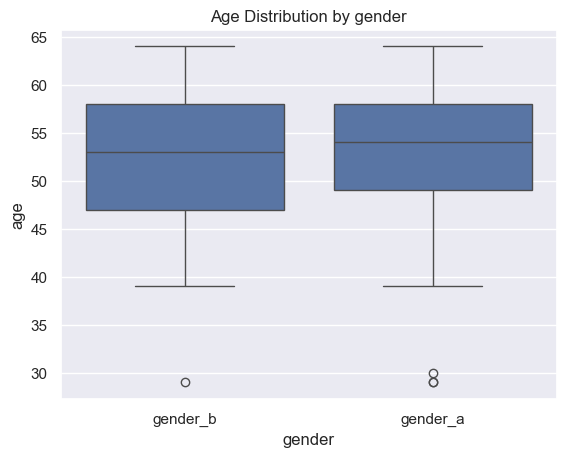

In [142]:
for col in categorical_cols:
    if col != 'cardio':
        sns.boxplot(x=col, y='age', data=df)
        plt.title(f'Age Distribution by {col}')
        plt.show()


### Violin Plots

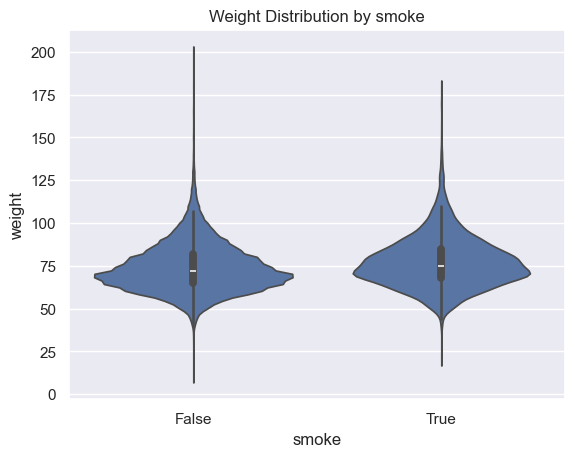

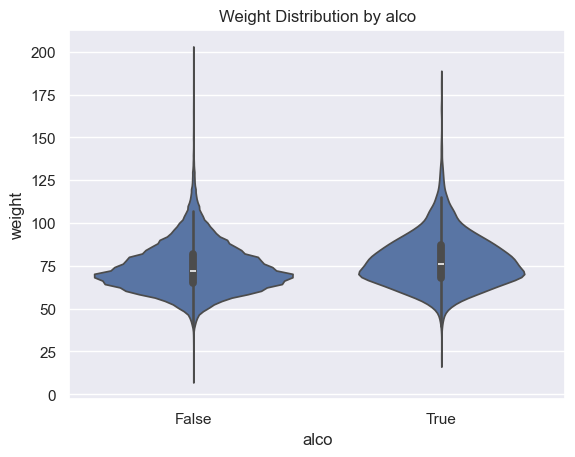

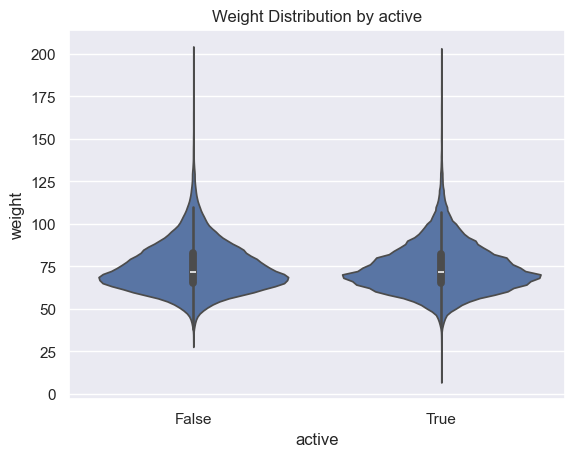

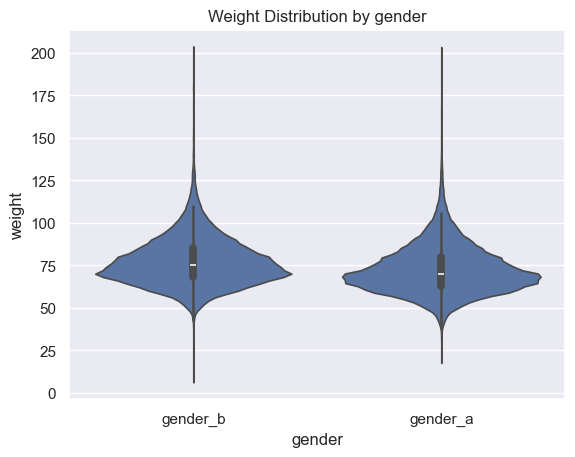

In [143]:
for col in categorical_cols:
    if col != 'cardio':
        sns.violinplot(x=col, y='weight', data=df)
        plt.title(f'Weight Distribution by {col}')
        plt.show()


## Target Variable Analysis (cardio)


### Distribution of Target

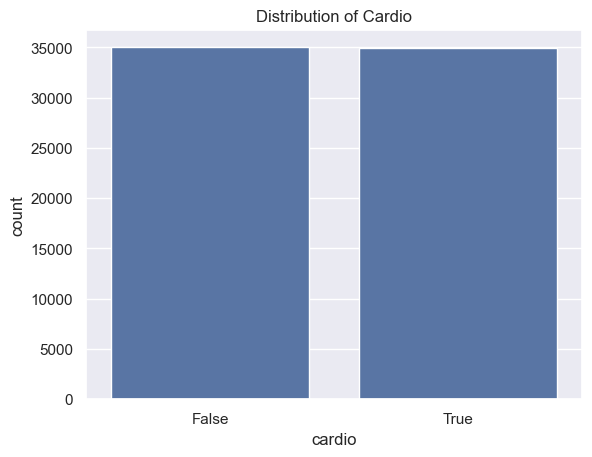

In [144]:
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardio')
plt.show()


### Numerical Features vs cardio

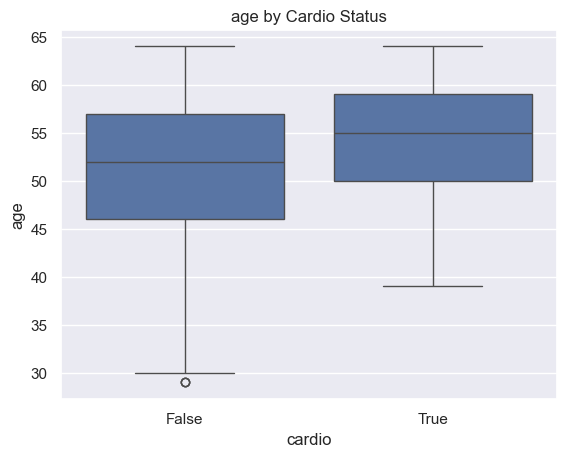

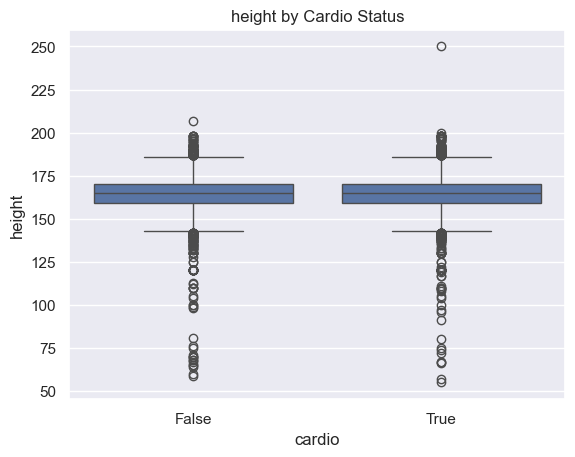

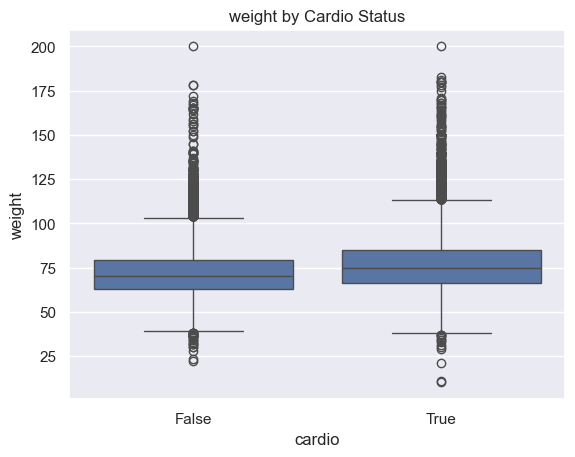

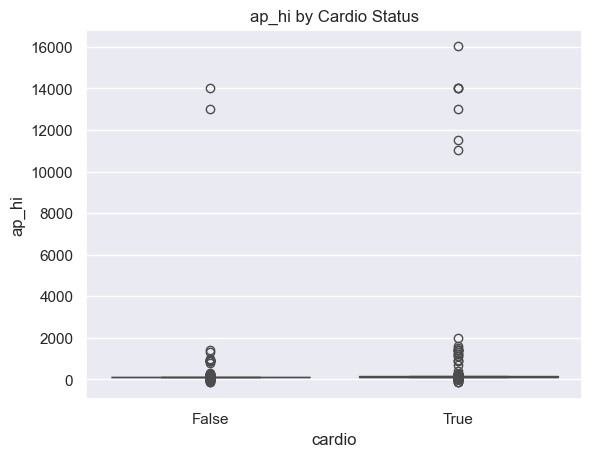

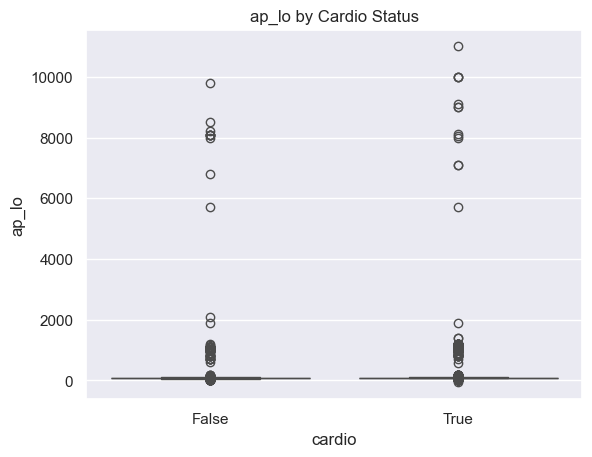

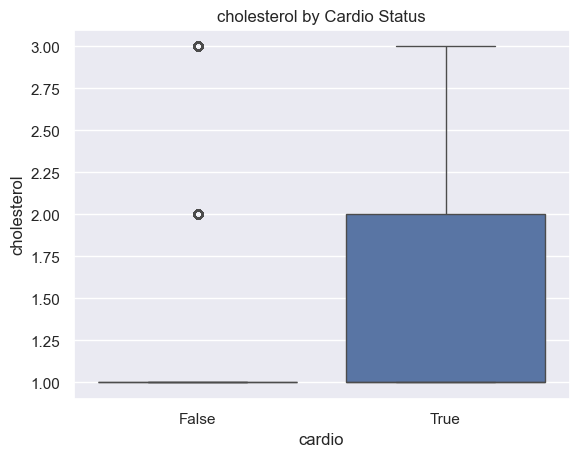

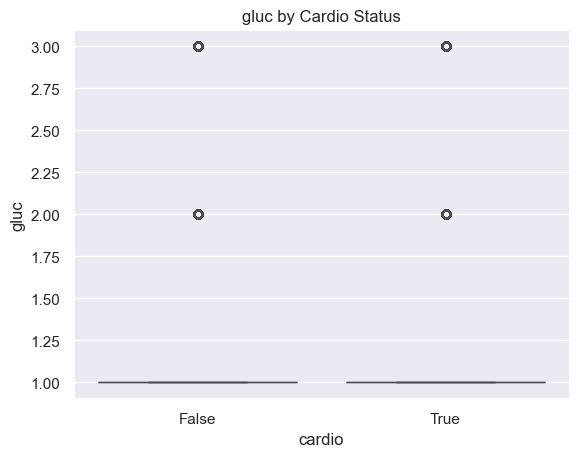

In [145]:
for col in numerical_cols:
    sns.boxplot(x='cardio', y=col, data=df)
    plt.title(f'{col} by Cardio Status')
    plt.show()


### Categorical Features vs cardio

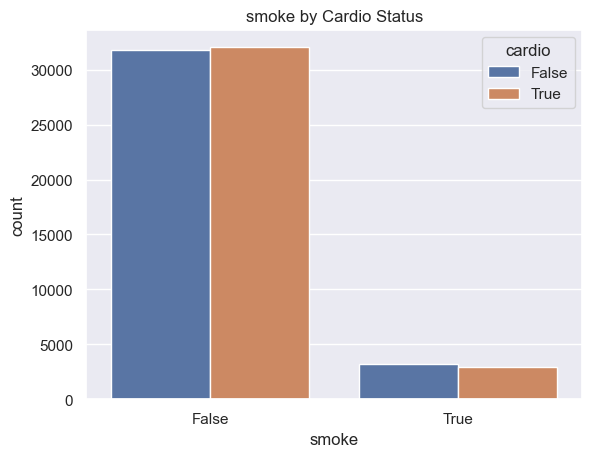

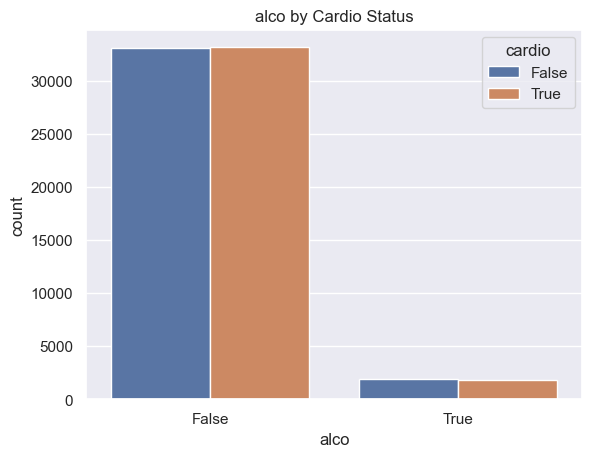

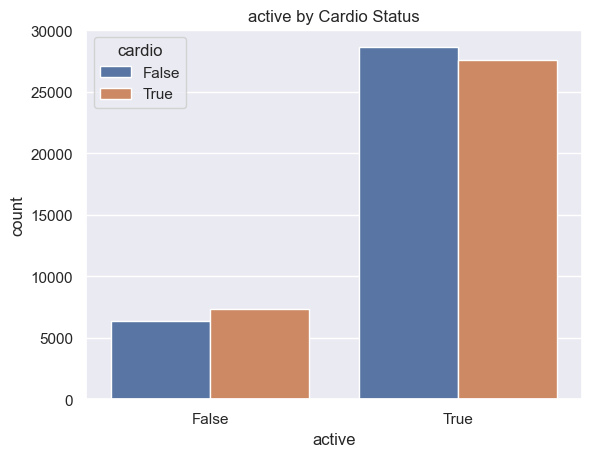

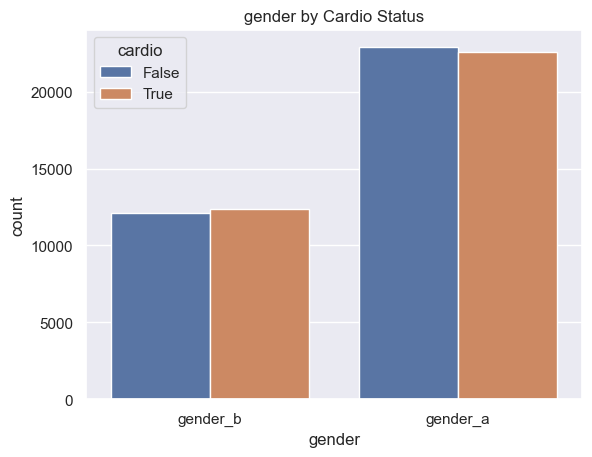

In [146]:
for col in categorical_cols:
    if col != 'cardio':
        sns.countplot(x=col, hue='cardio', data=df)
        plt.title(f'{col} by Cardio Status')
        plt.show()


## Derived Metrics and Advanced Visualizations

### BMI Calculation and Analysis

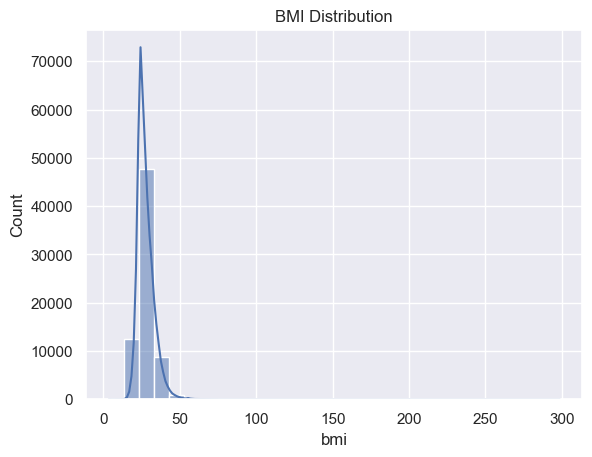

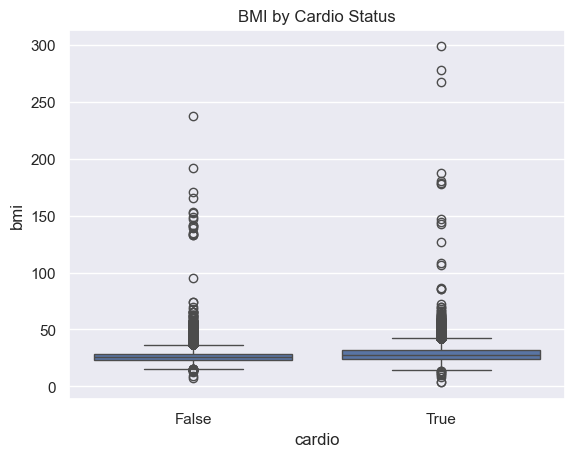

In [148]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.show()

sns.boxplot(x='cardio', y='bmi', data=df)
plt.title('BMI by Cardio Status')
plt.show()


### Age Analysis

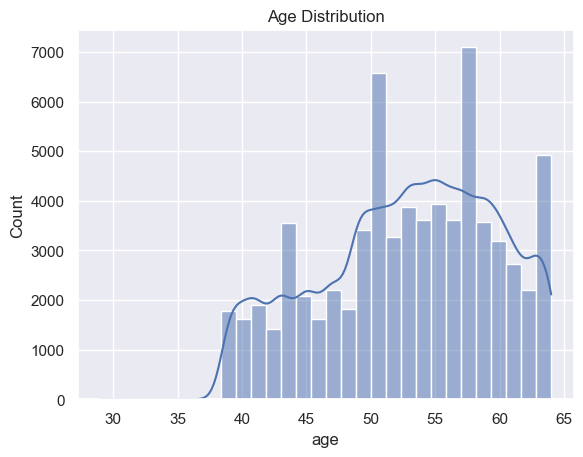

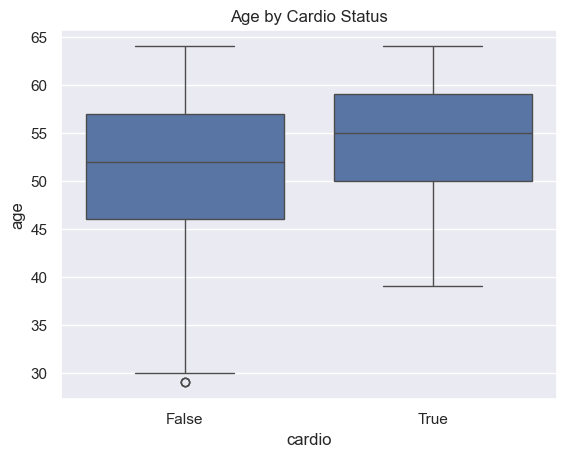

In [149]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='cardio', y='age', data=df)
plt.title('Age by Cardio Status')
plt.show()


### Facet Grids

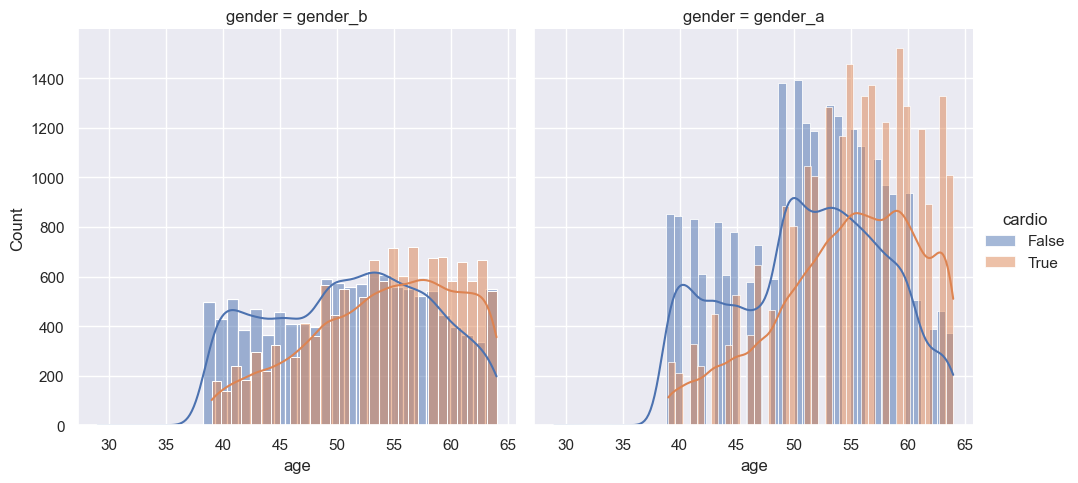

In [150]:
g = sns.FacetGrid(df, col="gender", hue="cardio", height=5, aspect=1)
g.map(sns.histplot, "age", kde=True, alpha=0.5)
g.add_legend()
plt.show()
